In [2]:
!pip3 install -q --upgrade ipython keras tensorflow
!pip3 install -q --upgrade ipykernel PIL
!ls -la chest_Xray

  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
total 36
drwxrwxr-x 5 wkyubi wkyubi  4096 mars  16 15:08 .
drwxrwxr-x 5 wkyubi wkyubi  4096 mars  30 14:50 ..
-rw-rw-r-- 1 wkyubi wkyubi 12292 mars  16 15:08 .DS_Store
drwxrwxr-x 4 wkyubi wkyubi  4096 mars  16 15:08 test
drwxrwxr-x 4 wkyubi wkyubi  4096 mars  16 15:08 train
drwxrwxr-x 4 wkyubi wkyubi  4096 mars  16 15:08 val


In [3]:
import os
import numpy as np
import pandas
import seaborn
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score

Using TensorFlow backend.


In [4]:
TEST_PATH = "./chest_Xray/test"
TRAIN_PATH = "./chest_Xray/train"
VAL_PATH = "./chest_Xray/val"

In [5]:
train_X = []
train_Y = []
for elem in os.listdir(TRAIN_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(TRAIN_PATH + "/" + elem):
            try:
                path = TRAIN_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                if img.shape[2] ==1:
                    img = np.dstack([img, img, img])
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = img.astype(np.float32)/255.
                train_X.append(img)
                train_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
train_X = np.array(train_X).reshape(-1, 224*224*3)
train_Y = np.array(train_Y)

.DS_Store failed
.DS_Store failed


In [6]:
val_X = []
val_Y = []
for elem in os.listdir(VAL_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(VAL_PATH + "/" + elem):
            try:
                path = VAL_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                img = img.astype(np.float32)/255.
                val_X.append(img)
                val_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
val_X = np.array(val_X).reshape(-1, 224*224*3)
val_Y = np.array(val_Y)

.DS_Store failed
.DS_Store failed


In [7]:
test_X = []
test_Y = []
for elem in os.listdir(VAL_PATH):
    is_pneumonia = 0.
    if elem == "PNEUMONIA":
        is_pneumonia = 1.
    try:
        for filename in os.listdir(TEST_PATH + "/" + elem):
            try:
                path = TEST_PATH + "/" + elem + "/"
                img = cv2.imread(str(path+filename))
                img = cv2.resize(img, (224,224))
                img = img.astype(np.float32)/255.
                test_X.append(img)
                test_Y.append(is_pneumonia)
            except:
                print(filename + " failed")
                pass
    except:
        pass
test_X = np.array(test_X).reshape(-1, 224*224*3)
test_Y = np.array(test_Y)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


NameError: name 'sea1' is not defined

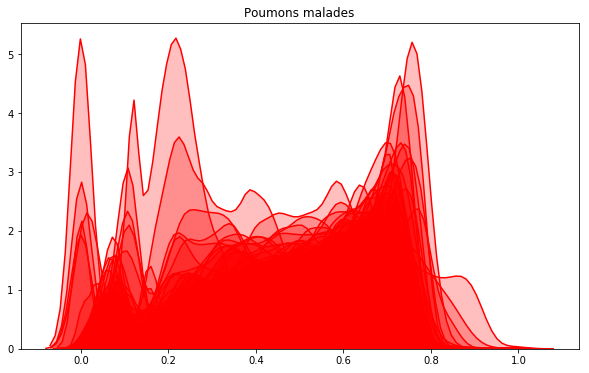

In [8]:
# QUELQUES POUMONS
print(val_Y)
plt.figure(figsize=(10,6))
plt.title("Poumons malades")
arrayX = []
for y in range(0, 40):
    if test_Y[y] == 1:
        seaborn.kdeplot(data=test_X[y], color="r", shade=True)
sea1.kdeplot(data=test_Y, shade=True)

seaborn.distplot(a=val_Y, kde=False)
plt.figure(figsize=(10,6))

seaborn.distplot(a=train_Y, kde=False)
plt.figure(figsize=(10,6))

seaborn.distplot(a=test_Y, kde=False)


#plt.figure(figsize=(10,6))
#plt.title("Poumons sains")

#for y in range(300, 340):
#    if test_Y[y] == 0:
#        seaborn.kdeplot(data=test_X[y], color="b", shade=True)

        
# TOUS LES POUMONS
#plt.figure(figsize=(10,6))
#plt.title("Poumons sains")
#for y in test_Y:
#    if y == 1:
#        for x in test_X:
#            seaborn.kdeplot(data=x, color="r", shade=True)
#plt.figure(figsize=(10,6))
#plt.title("Poumons malades")
#for y in test_Y:
#    if y == 0:
#        for x in test_X:
#            seaborn.kdeplot(data=x, color="b", shade=True)
#seaborn.kdeplot(data=test_Y, shade=True)


In [ ]:
#Le modèle ne s'entraine pas correctement ou alors c'est la cross validation qui ne va pas

model = RandomForestClassifier(random_state = 1, n_estimators=100, max_depth=15)
model.fit(train_X, train_Y)
scores = cross_val_score(model, val_X, val_Y)
print(scores.mean())

In [ ]:
#La cross_validation est à vérifier

scores_preds = cross_val_predict(model, test_X, test_Y)
print(scores_preds.mean())

In [ ]:
#J'ai pas compris à quoi ça correspond, je sais pas si le chiffre doit être bas ou élevé
print(roc_auc_score(test_Y, scores_preds))